## What Is the Relationship between Housing Characteristics and Complaints?

The goal of this exercise is to find the answer to the Question 3 of the problem statement: 

Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

In [2]:
import types
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cred = ibm_boto3.client(service_name='Replace with your service id',
    ibm_api_key_id='Replace with your ibm api key id',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cred.get_object(Bucket='Replace with your ibm bucket id',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body)


## Read Datasets
1. Read 311 complaints dataset
2. Read Bronx(Pluto) Dataset
3. Filter out 311 dataset to capture top borough of our top complaint(HEAT/HOT WATER)
4. Filter out relevant columns in Bronx dataset

### Read 311 complaints and Bronx(Pluto Dataset)

In [3]:
#import the bronx borough data
data_bx = pd.read_csv(body)
data_bx.head()

#import the 311 data
bucket='replace with your bucket id'

#Read Data
url= 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'
nyc311= pd.read_csv(url, parse_dates= True)

#Upload the file to cloud
nyc311.to_csv('./df_raw.csv')
client_cred.upload_file('./df_raw.csv',bucket,'nyc311.csv')


#Read file back
client_cred.download_file(Bucket=bucket,Key='nyc311.csv',Filename='nyc311')
df = pd.read_csv('nyc311', parse_dates= ['created_date', 'closed_date'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Filter out our top complaint type

In [4]:
data_h= df[(df['borough'] == 'BRONX') & (df['complaint_type'] == 'HEAT/HOT WATER')]
data_h.head()

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
1,1,2019-12-06 03:21:57,45098170,PAINT/PLASTER,10467.0,3857 WHITE PLAINS ROAD,WHITE PLAINS ROAD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.885136,-73.861955,NaT,RESIDENTIAL BUILDING,Open
4,4,2019-12-06 03:09:33,45097981,HEAT/HOT WATER,10467.0,3857 WHITE PLAINS ROAD,WHITE PLAINS ROAD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.885136,-73.861955,2019-12-07 18:42:35,RESIDENTIAL BUILDING,Closed
6,6,2019-12-06 07:47:28,45097572,PAINT/PLASTER,10460.0,642 MORRIS PARK AVENUE,MORRIS PARK AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.844676,-73.868309,NaT,RESIDENTIAL BUILDING,Open
12,12,2019-12-06 07:53:41,45096211,HEAT/HOT WATER,10456.0,256 EAST 166 STREET,EAST 166 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.830670,-73.916123,2019-12-07 17:50:14,RESIDENTIAL BUILDING,Closed
16,16,2019-12-06 08:31:33,45095837,WATER LEAK,10472.0,1218 MANOR AVENUE,MANOR AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.829592,-73.876535,NaT,RESIDENTIAL BUILDING,Open


### Filter out relevant columns

In [5]:
#Glimpse of the Bronx data
data_bx.head()
data_bx.columns

#Let's subset the data and keep variables necessary for our analysis
bronx= data_bx[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 
'YCoord', 'XCoord']]

bronx.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [6]:
#Shape of the data
print(bronx.shape)

#Bronx data types
print(bronx.dtypes)

(89854, 20)
Address        object
BldgArea        int64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea         int64
LotDepth      float64
NumBldgs        int64
NumFloors     float64
OfficeArea      int64
ResArea         int64
ResidFAR      float64
RetailArea      int64
YearBuilt       int64
YearAlter1      int64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object


Before proceeding to handling the missing values in our Bronx borough dataset, let's create a dataset by merging our 311 dataset and the Bronx borough dataset.

In [33]:
#Subset our 311 for hot/heat water dataset with the columns we would like to merge
heat_m=data_h[['incident_address', 'status']]

#Let's merge both datasets using incident address from 311 data and Address from Bronx borough
total_merge= bronx.merge(heat_m, left_on='Address', right_on='incident_address', how='left')
total_merge.head()

total_merge.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord', 'incident_address', 'status'],
      dtype='object')

In [34]:
total_merge.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,incident_address,status
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,...,0,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN,NaN
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,...,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN,NaN
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,...,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN,NaN
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,144 BRUCKNER BOULEVARD,Closed
4,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,144 BRUCKNER BOULEVARD,Closed


### Convert Status into categorical values

We would like to check the correlation between variables in the complaint data and the building characteristics, so we need to identify whether a building or a charaterictic from the building had previously open an issue or not.
So we will encode status variable with the following logic.
If a building has already reported an issue we categorize as 1 and if no issue reported we use 0.
NaN rows for the status column will be filled with 0 as well.

In [35]:
#Map status column with new encoded variables
dict1= {'Closed': 1, 'Open': 1}
total_merge['status']= total_merge['status'].map(dict1)

In [36]:
#Now, let's fill missing values with 0
total_merge['status'] = total_merge['status'].fillna(0)

In [37]:
total_merge['status'].unique()

array([0., 1.])

### Correlation among variables

##### 1. Pearson Correlation

In [38]:
total_merge.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,status
BldgArea,1.000000,0.420954,0.467296,-0.002259,0.261559,0.141840,0.189726,0.474359,0.458352,0.613144,0.151697,0.964210,0.239538,0.171725,0.091432,0.124494,-0.053930,-0.049248,-0.166252,0.283481
BldgDepth,0.420954,1.000000,0.269040,0.005368,0.384031,-0.068287,0.050503,0.400251,0.020461,0.418054,0.084222,0.412571,0.368987,0.158329,0.268156,0.180959,-0.168658,-0.044898,-0.288318,0.466762
BuiltFAR,0.467296,0.269040,1.000000,-0.005047,0.332186,0.121029,-0.001631,0.003594,0.230408,0.401733,0.002306,0.486820,0.315153,0.147576,0.138881,0.119637,-0.143809,-0.040728,-0.256484,0.399661
CommFAR,-0.002259,0.005368,-0.005047,1.000000,0.118166,0.040743,0.002151,0.015773,-0.000130,-0.030443,0.024142,-0.019178,0.010143,0.101412,-0.074047,0.064944,-0.037673,-0.100308,-0.066408,-0.036038
FacilFAR,0.261559,0.384031,0.332186,0.118166,1.000000,0.010457,0.002977,0.062927,-0.054139,0.415523,0.020931,0.271394,0.869651,0.101490,0.093749,0.162768,-0.422241,-0.238352,-0.646901,0.488815
Lot,0.141840,-0.068287,0.121029,0.040743,0.010457,1.000000,0.023559,0.024790,0.112471,0.059296,0.009225,0.128652,-0.009644,0.203871,-0.006250,-0.045910,0.007805,-0.006905,-0.033563,-0.003995
LotArea,0.189726,0.050503,-0.001631,0.002151,0.002977,0.023559,1.000000,0.283673,0.306527,0.070189,0.100103,0.141115,0.001820,0.020523,-0.001387,0.018618,0.045404,-0.003715,-0.000617,0.012432
LotDepth,0.474359,0.400251,0.003594,0.015773,0.062927,0.024790,0.283673,1.000000,0.195047,0.308456,0.124004,0.451343,0.049696,0.089238,-0.009803,0.031665,0.005115,-0.034352,-0.035156,0.075069
NumBldgs,0.458352,0.020461,0.230408,-0.000130,-0.054139,0.112471,0.306527,0.195047,1.000000,0.038240,0.084871,0.415897,-0.057370,0.037194,0.117487,0.010182,0.091028,0.010203,0.064768,-0.025571
NumFloors,0.613144,0.418054,0.401733,-0.030443,0.415523,0.059296,0.070189,0.308456,0.038240,1.000000,0.019226,0.616226,0.368135,0.076624,0.262905,0.155947,-0.173533,-0.064215,-0.318492,0.535236


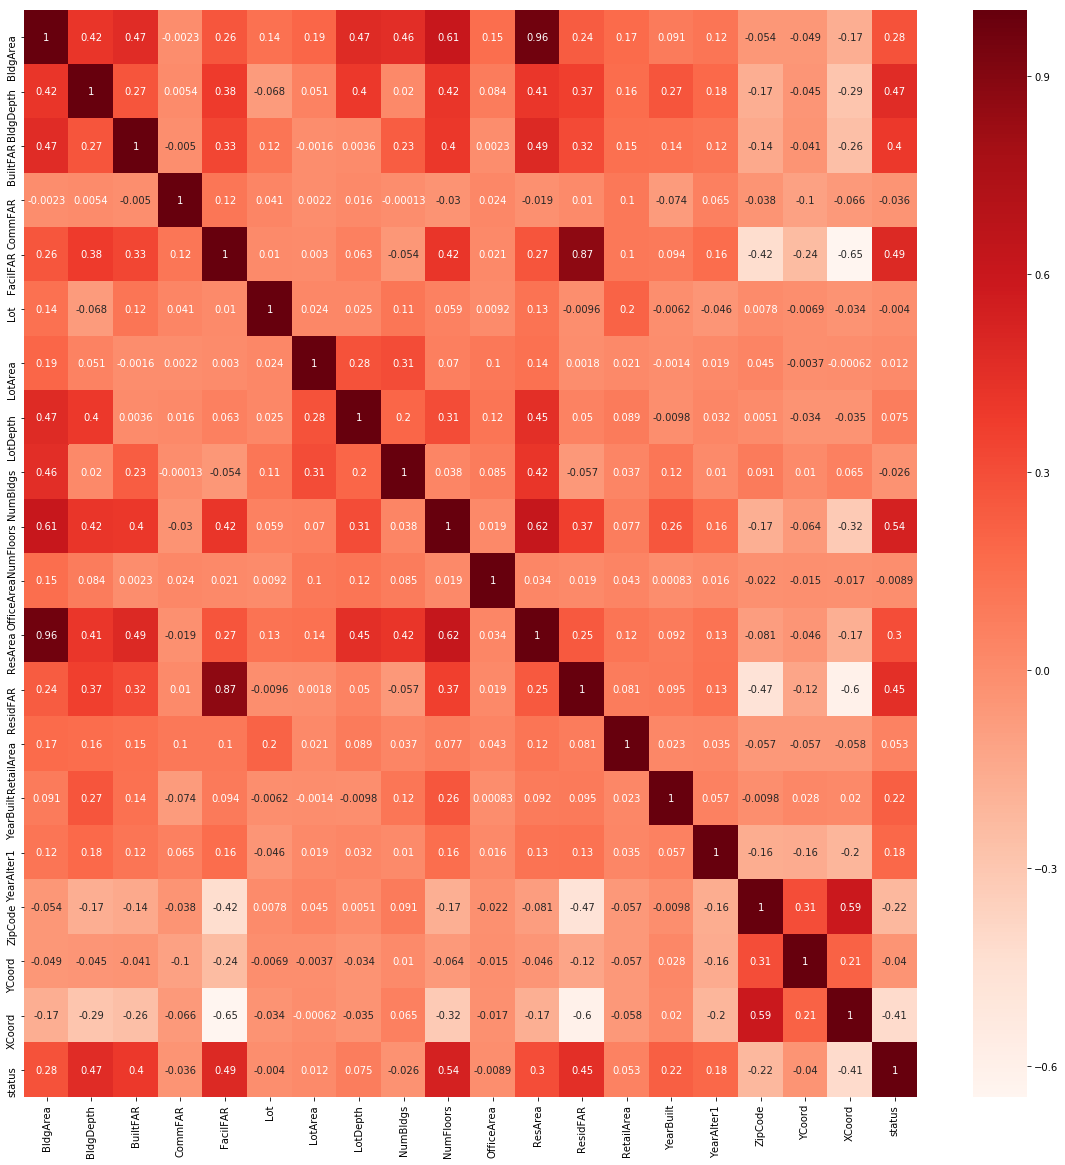

In [39]:
cor = total_merge.corr()

#plot correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##### From the correlation matrix, we observe that FacilFAR, NumFloors, ResArea, ResidFAR, YearBuilt, BuiltFAR, BldDepth and BldArea have the strongest relation with our top complaint.

### Prepare our dataset for feature selection algorithms

Let's prepare our dataset for feature selection and remove features that are negatively correlated to HEAT/HOT WATER complaint.

In [40]:
drop_col=['status', "ZipCode", 'CommFAR', 'Lot', 'OfficeArea', 
          'incident_address', 'Address', 'NumBldgs', 'YCoord', 'XCoord']
y= total_merge['status']
x= total_merge.drop(drop_col, axis=1)

In [41]:
#Fill NaN values in our dataset 
x= x.fillna(0)
x.head()

,BldgArea,BldgDepth,BuiltFAR,FacilFAR,LotArea,LotDepth,NumFloors,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1
0,0,0.0,0.00,6.5,15000,200.0,0.0,0,6.02,0,0,0
1,752,16.0,0.05,6.5,13770,100.0,1.0,0,6.02,0,1931,1994
2,39375,200.0,1.13,6.5,35000,200.0,2.0,0,6.02,0,1931,0
3,12500,85.0,5.00,6.5,2500,100.0,5.0,12500,6.02,0,1931,2001
4,12500,85.0,5.00,6.5,2500,100.0,5.0,12500,6.02,0,1931,2001


Number of affected building: 298329
Number of building with no issue: 76203


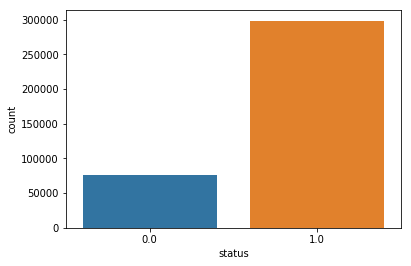

In [42]:
#Let's plot the number of buildings with and without issues 
ax=sns.countplot(y, label='Count')
B, M = y.value_counts()
print('Number of affected building:', B)
print('Number of building with no issue:', M)

### Feature Selection with SelectKBest method

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#k=6, k is the number of best features

select_feature = SelectKBest(chi2, k=6).fit(x_train, y_train)

In [45]:
for i in range(0, len(select_feature.scores_)):
    print(x_train.columns[i], ':' ,select_feature.scores_[i])

BldgArea : 2276550206.097799
BldgDepth : 1124940.8638652652
BuiltFAR : 110502.93405299366
FacilFAR : 39342.09120624046
LotArea : 46483564.08117056
LotDepth : 43983.04971698611
NumFloors : 106854.62993149101
ResArea : 2441283096.9417844
ResidFAR : 49518.168126747165
RetailArea : 10898557.056113463
YearBuilt : 470733.78143052815
YearAlter1 : 13741562.988742499


### XGBoost Feature Selection

[0.05217391 0.07826087 0.0768116  0.02898551 0.0884058  0.06376812
 0.07246377 0.2289855  0.06376812 0.00869565 0.20434782 0.03333334]


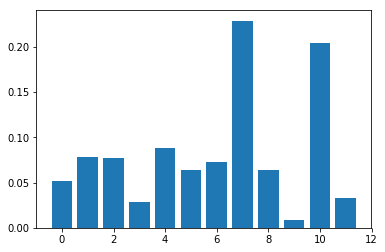

In [46]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

#Fit the model
xgb=XGBClassifier()
xgb.fit(x_train, y_train)

#Feature importance
print(xgb.feature_importances_)

#Visualize
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

In [47]:
for i in range(0, len(xgb.feature_importances_)):
    print(x_train.columns[i], ':', xgb.feature_importances_[i])

BldgArea : 0.052173913
BldgDepth : 0.07826087
BuiltFAR : 0.0768116
FacilFAR : 0.028985508
LotArea : 0.088405795
LotDepth : 0.06376812
NumFloors : 0.072463766
ResArea : 0.2289855
ResidFAR : 0.06376812
RetailArea : 0.008695652
YearBuilt : 0.20434782
YearAlter1 : 0.033333335


### Relationship between complaint and building characteristics

1. With Pearson-correlation, the following are the most pertinant features
     - FacilFAR
     - NumFloors
     - ResidFAR
     - YearBuilt 
     - BuiltFAR 
     - BldDepth 
     - BldArea
     - ResArea
 2. With SelectKBest
     - BldArea
     - LotArea
     - YearAlter1
     - ResArea
     - BuiltFAR
     - BldDepth
 3. With XGBoost
     - YearBuilt
     - ResArea
     - LotArea
     - BldgArea 
     - BldgDepth 
     - BuiltFAR
     
 Overall, we can conclude that with these three techniques, BldArea, BuildDepth, ResArea, YearBuilt, LotArea are the features that stood out.

In [48]:
#Upload the merged file to cloud
total_merge.to_csv('./df_merge.csv')
client_cred.upload_file('./df_merge.csv',bucket,'total_merge.csv')